<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/happy.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Happy 데이터를 대상으로 모델링을 진행합니다.
- LinearRegression 알고리즘을 사용합니다.
- 다양한 방법으로 모델 성능을 평가합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/income_happy.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [4]:
# 상위 몇 개 행 확인
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


**데이터 설명**

- income: 수입 (단위: 10,000$)
- happiness: 행복 정도 (1~ 10)

In [5]:
# 하위 몇 개 행 확인
data.tail()

,income,happiness
493,5.249209,4.568705
494,3.471799,2.535002
495,6.087610,4.397451
496,3.440847,2.070664
497,4.530545,3.710193


In [6]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
# 데이터 크기 확인
data.shape

(498, 2)

In [8]:
# 기술통계 확인
data.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


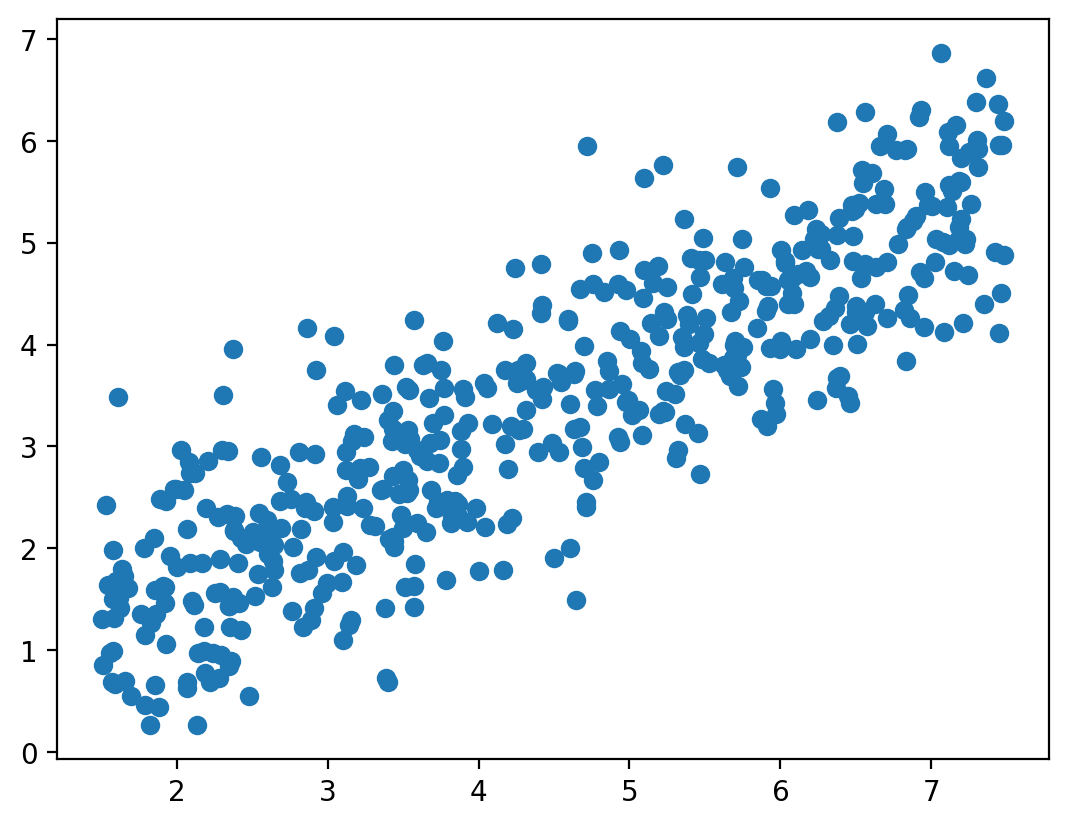

In [18]:
plt.scatter(data['income'],data['happiness'])

<AxesSubplot:xlabel='income', ylabel='happiness'>

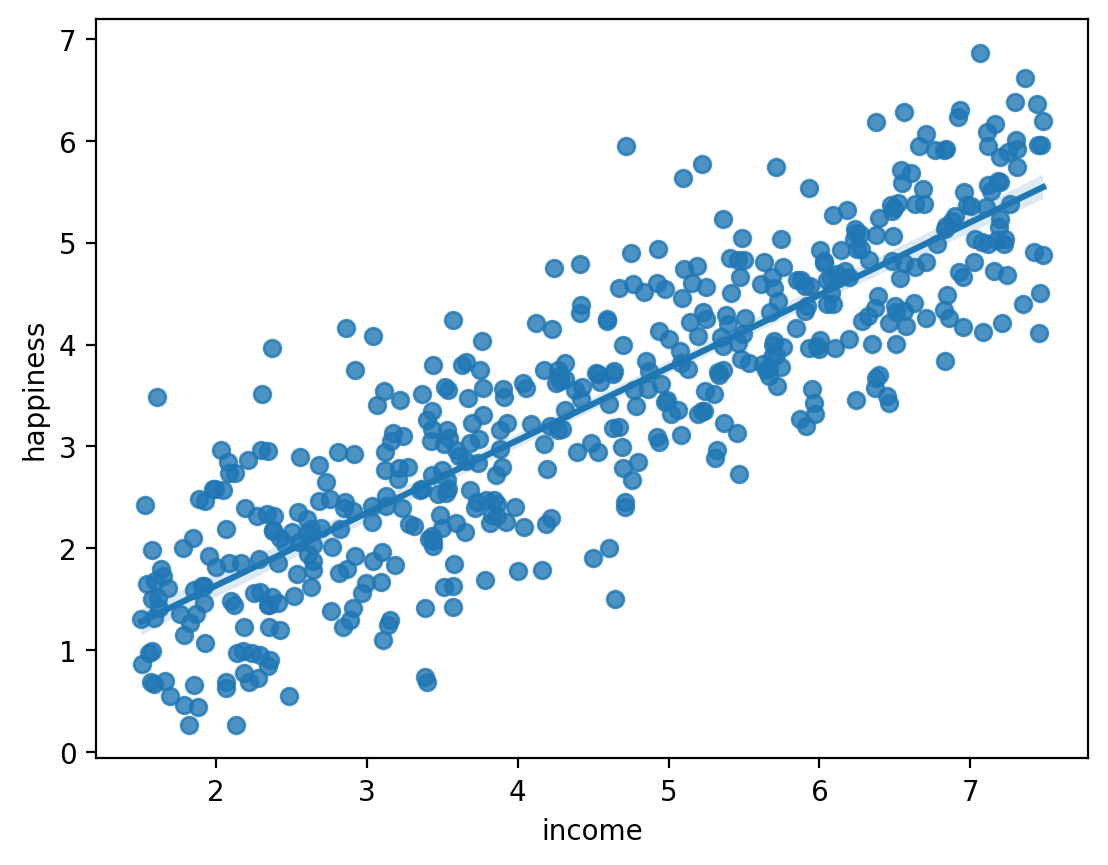

In [61]:
sns.regplot(data['income'],data['happiness'])

In [9]:
# 상관관계 확인
data.corr()

,income,happiness
income,1.000000,0.865634
happiness,0.865634,1.000000


<AxesSubplot:>

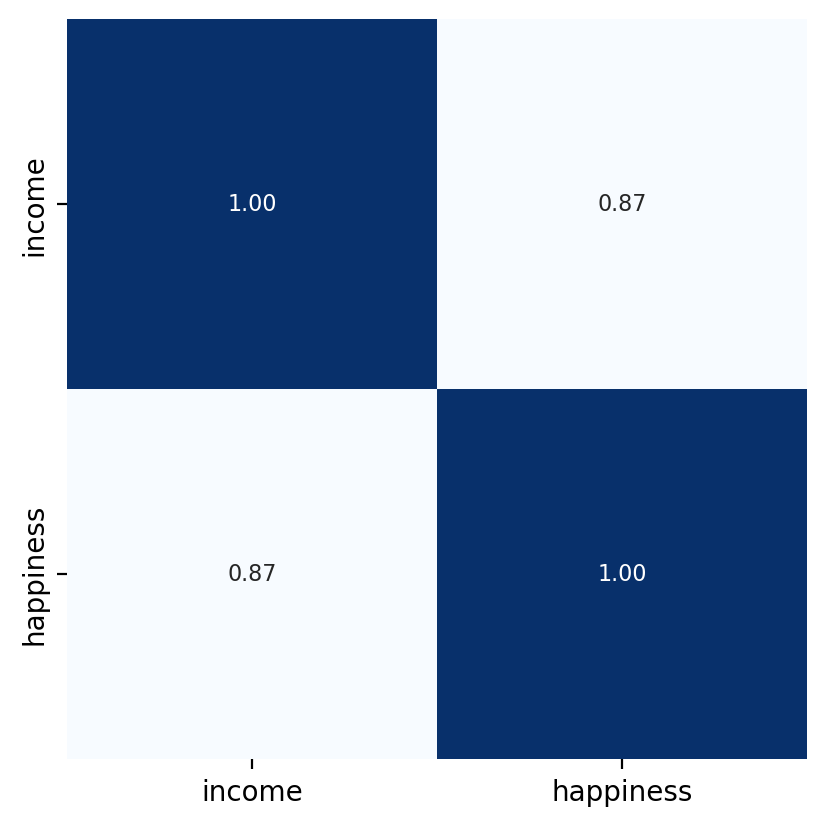

In [14]:
sns.heatmap(data.corr(), cmap='Blues' ,cbar=False, annot=True, annot_kws={'size':8}, fmt='.2f', square=True)

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [19]:
# target 확인
target = 'happiness'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [20]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train ,X_test, y_train ,y_test = train_test_split(x, y, test_size=0.3)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘을 사용합니다|.
    - 알고리즘: LinearRegression

In [52]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [53]:
# 2단계: 선언하기
# model = LinearRegression()
# model = KNeighborsRegressor()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

In [54]:
# 3단계: 학습하기
model.fit(X_train ,y_train)

RandomForestRegressor()

In [55]:
# 4단계: 예측하기
y_pred = model.predict(X_test)

# 5.회귀 성능 평가

- 다양한 성능 지표로 회귀 모델 성능을 평가합니다.

**1) MAE(Mean Absolute Error)**

In [56]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_error

# 성능 평가
mean_absolute_error(y_test, y_pred)

0.6484044277722003

**2) MSE(Mean Squred Error)**

In [57]:
# 모듈 불러오기
from sklearn.metrics import mean_squared_error
# 성능 평가
mean_squared_error(y_test, y_pred)

0.677484798774902

**3) RMSE(Root Mean Squred Error)**

In [58]:
# 모듈 불러오기
mean_squared_error(y_test, y_pred)**(0.5)

0.8230946475192886

**4) MAPE(Mean Absolute Percentage Error)**

In [59]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_percentage_error

# 성능 평가
mean_absolute_percentage_error(y_test, y_pred)

0.2737520460172831

**5) R2-Score**

In [60]:
# 모듈 불러오기
from sklearn.metrics import r2_score

# 성능 평가
r2_score(y_test, y_pred)

0.6347433173018436